<a href="https://colab.research.google.com/github/shadowluigi27/Projects-in-ML-F22/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: 
The problem I would like to solve with ML is to determine if the gender,age,or salary of a person determines if they would want to buy a car.

This is best used using logistic regression since salary and ages are continous values.


In [708]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

# Task 2: 
Dataset link: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset 

EDA of dataset below


In [709]:
df = pd.read_csv('car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [710]:
df.shape

(1000, 5)

In [711]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

No missing Data, user ID is only an identifier, not useful for data

In [712]:
df = df.drop('User ID', axis=1)

In [713]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [714]:
df.describe(include=['O'])

,Gender
count,1000
unique,2
top,Female
freq,516


We can assign gender into a numerical value to get rid of all catagorical columns


In [715]:
df.Gender = df.Gender.map({ 'Male': 0, 'Female': 1 })

In [716]:
df.Purchased.value_counts(normalize=True)

0    0.598
1    0.402
Name: Purchased, dtype: float64

Data is Relativly Balanced with a 60:40 spread

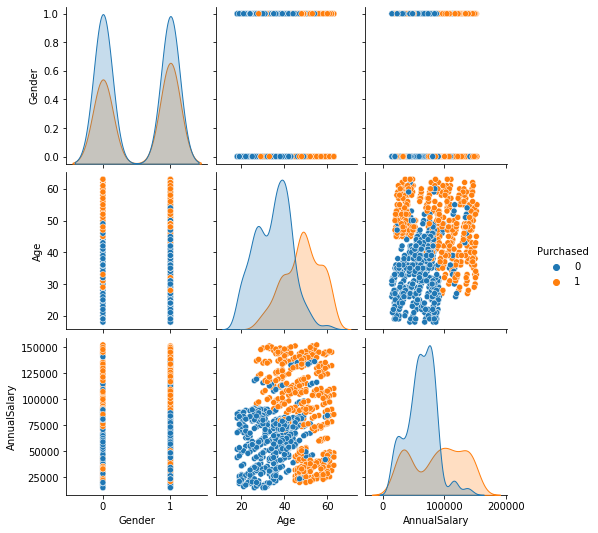

In [717]:
sns.pairplot(df, hue='Purchased')

From an initial view of the graph, we can get that there are about equal numbres of men and women who haven't purchased a car, but slightly more women have purchased the car than men, this is probably due to the 16 more females than males in the dataset.

There is a good spread of both women and men in the age groups and salary

it seems most people who have purchased cars are more likly to be older, no matter what annual 
salary they have

In [718]:
df.corr()['Purchased'].sort_values(ascending=False)

Purchased       1.000000
Age             0.616036
AnnualSalary    0.364974
Gender          0.047211
Name: Purchased, dtype: float64

# TASK 3

I will be using Batch and SGD gradient descents for my model

##Setting up variables and functions


In [719]:
def sigmoid(A):
  return   1 / (1 + np.exp(-A))

In [720]:
def cost_func(A,Y):
  m = A.shape[0]
  loss = (-1/m) * np.sum( (Y * np.log(A)) + ( (1-Y) * (np.log(1-A)) )  )
  return loss

In [721]:
def dw(A,Y,X):
  n = A.shape[0]
  np.dot(X, (A-Y).T)/n

In [722]:
def db(A,Y):
  n = A.shape[0]
  db= np.sum(A-Y)/n

In [723]:
#independant variables
X = df.drop("Purchased", axis=1)
#target
Y = df.Purchased.values.reshape(df.shape[0],1)

sx = MinMaxScaler()
X = sx.fit_transform(X)

##Gradient Descent (Batch)

In [724]:
#initial weights
w =np.random.rand(1,3)
print(w)

#initial bias
b = np.random.rand(1,1)
print(b)

#learning value
alpha = .6

[[0.5976505  0.28427132 0.26460941]]
[[0.38321963]]


In [725]:
epochs = 200
for i in range(epochs):
    y_hat =  np.dot(X,w.T)+ b
    A = sigmoid( y_hat ) # = sigmoid of predicted value

    loss =  (-1/1000)* np.sum( (Y * np.log(A)) + ( (1-Y) * (np.log(1-A)) )  )
    dw = np.dot((A-Y).T,X )/1000
    db= np.sum(A-Y)/1000

    w = w - alpha * dw
    b = b - alpha * db

Accuracy

In [726]:
predicted_right = 0
for i in range(1000):
  sigma = sigmoid(np.dot(X[i],w.T)+ b)
  predict = 0 if sigma < .5 else 1

  if predict == Y[i]:
    predicted_right+=1

predicted_right/1000

0.817

##SGD algortihm


In [727]:
#initial weights
w =np.random.rand(1,3)
print(w)

#initial bias
b = np.random.rand(1,1)
print(b)

#learning value
alpha = .6

[[0.90438135 0.82900565 0.15895099]]
[[0.19621903]]


In [728]:
import random
epochs = 200

for i in range(epochs):
    df.sample(frac = 1)
    #independant variables
    X = df.drop("Purchased", axis=1)
    #target
    Y = df.Purchased.values.reshape(df.shape[0],1)

    sx = MinMaxScaler()
    X = sx.fit_transform(X)
    for j in range(1000):
      
      sample_x = X[j]
      sample_y = Y[j]

      y_hat =  np.dot(sample_x,w.T)+ b
      A = sigmoid(  y_hat ) # = sigmoid of predicted value

      loss =  -1 * np.sum( (sample_y * np.log(A)) + ( (1-sample_y) * (np.log(1-A)) )  )
      
      sample_x = np.reshape(sample_x,[1,3])
      dw = np.dot((A-sample_y).T,sample_x )
      db= np.sum(A-sample_y)

      w = w - alpha * dw
      b = b - alpha * db


Accuracy

In [729]:
predicted_right = 0
for i in range(1000):
  sigma = sigmoid(np.dot(X[i],w.T)+ b)
  predict = 0 if sigma < .5 else 1

  if predict == Y[i]:
    predicted_right+=1

predicted_right/1000

0.807

#TASK 4

I will be optmizing it using the momentum and Nesterov accelerated gradient


In [730]:
#initial weights
w =np.random.rand(1,3)
print(w)

#initial bias
b = np.random.rand(1,1)
print(b)

#learning value
alpha = .6

[[0.70900375 0.228096   0.97553671]]
[[0.84062247]]


##Momentum 

In [731]:
import random
epochs = 200
momentum_val = .9
prev_dw = 0.0
prev_db = 0.0
for i in range(epochs):
    df.sample(frac = 1)
    #independant variables
    X = df.drop("Purchased", axis=1)
    #target
    Y = df.Purchased.values.reshape(df.shape[0],1)

    sx = MinMaxScaler()
    X = sx.fit_transform(X)

    for j in range(1000):
      choice = random.randint(0,999)
      sample_x = X[choice]
      sample_y = Y[choice]

      y_hat =  np.dot(sample_x,w.T)+ b
      A = sigmoid(  y_hat ) # = sigmoid of predicted value

      loss =  -1 * np.sum( (sample_y * np.log(A)) + ( (1-sample_y) * (np.log(1-A)) )  )
      
      sample_x = np.reshape(sample_x,[1,3])
      dw = np.dot((A-sample_y).T,sample_x )
      db= np.sum(A-sample_y)

      w = w - ( (alpha * dw) + (momentum_val * prev_dw) )
      b = b - ( (alpha * db) + (momentum_val * prev_db) )

      prev_dw = dw
      prev_db = db


Accuracy

In [732]:
predicted_right = 0
for i in range(1000):
  sigma = sigmoid(np.dot(X[i],w.T)+ b)
  predict = 0 if sigma < .5 else 1

  if predict == Y[i]:
    predicted_right+=1

predicted_right/1000

0.769

#Nesterov accelerated gradient


In [733]:
import random
epochs = 200
momentum_val = .9
prev_dw = 0.0
prev_db = 0.0
for i in range(epochs):
    df.sample(frac = 1)
    #independant variables
    X = df.drop("Purchased", axis=1)
    #target
    Y = df.Purchased.values.reshape(df.shape[0],1)

    sx = MinMaxScaler()
    X = sx.fit_transform(X)

    for j in range(1000):
      choice = random.randint(0,999)
      sample_x = X[choice]
      sample_y = Y[choice]

      y_hat =  np.dot(sample_x,w.T)+ b
      A = sigmoid(  y_hat ) # = sigmoid of predicted value

      loss =  -1 * np.sum( (sample_y * np.log(A)) + ( (1-sample_y) * (np.log(1-A)) )  )
      
      sample_x = np.reshape(sample_x,[1,3])
      dw = np.dot((A-sample_y).T,sample_x )
      db= np.sum(A-sample_y)

      dw_momentum = momentum_val * prev_dw
      db_momentum = momentum_val * prev_db

      w = w -  ((alpha * (dw-dw_momentum)) + dw_momentum)
      b = b -  ((alpha * (db-db_momentum)) + db_momentum)

      prev_dw = dw
      prev_db = db


Accuracy

In [734]:
predicted_right = 0
for i in range(1000):
  sigma = sigmoid(np.dot(X[i],w.T)+ b)
  predict = 0 if sigma < .5 else 1

  if predict == Y[i]:
    predicted_right+=1

predicted_right/1000

0.82

#Discussion

The optimization of the SGD algorithim with momentum actually decreased the accuracy compared to regular SGD, which is relativly surprising considering this is used to dampen the effect of going overboard. this could be due to my relativly low learning rate of .6. 

On the other hand,  Nesterov accelerated gradient slightly increased our accuracy compared the the regular SGD.

We should definitly used optimization algorithims to help train our data quicker and more accuratly, but careful consideration should be done before choosing what optimization you would want your model to have, since as we see above, some optimizations can actually decrease performance
